## 初期設定

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import glob

from select_datasets import Select_datasets as my_SD

from visualize import visualization
myvs = visualization()

In [6]:
# Constant

f_s = 12.5*10**3
th_s = 2
N = 4096
pixel_number=36

f_range = f_s/th_s
f_resolution = f_range/N

In [7]:
#sample_data

path="/data7/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

d = np.load(npz_files[3])

D_df = pd.DataFrame(d["arr_0"]).T

## データ取得

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
min_freq = 0.1
max_freq = 15

start = math.ceil(min_freq/f_resolution)-1
stop = math.ceil(max_freq/f_resolution)-1

x = np.arange(start+1,stop+1)*f_resolution
D_df_limfreq = D_df.iloc[:,start:stop]

print(start,stop)

0 9


In [10]:
myds = my_SD("/data7/ALL/db/ns/8k")

data_df = myds.concat_npz()

In [11]:
data_df_pre = data_df.iloc[:,start:stop]
data_df_pre.replace(0, np.nan, inplace=True)

/tmp/ipykernel_2585375/2390711002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_pre.replace(0, np.nan, inplace=True)


In [12]:
data_df_pre=data_df_pre.dropna(axis=0,how="all")
data_df_pre=data_df_pre.dropna(0)
data_df_pre.index = list(range(0,len(data_df_pre)))
data_df_pre

/tmp/ipykernel_2585375/1731398658.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_df_pre=data_df_pre.dropna(0)


0           1           2           3           4  \
0       172.896067  176.513317  251.178517  237.754544  296.303427   
1        75.659870  120.790621  169.793157  125.246630  179.171441   
2        96.913210  113.915134  121.180175  122.038119  161.548251   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
4       152.509383   80.845047  142.408379  100.871204  170.583987   
...            ...         ...         ...         ...         ...   
103606  122.093491  116.433336  145.048783  114.312061  192.500221   
103607  104.721016  133.593078  151.468548  248.887670  189.338949   
103608   46.706180  152.973006  166.045044  166.933334  203.486829   
103609  105.969081  152.464743  240.822518  264.686312  293.389996   
103610  144.451794   98.450465  165.335247  225.233102  234.669472   

                 5           6           7           8  
0       458.932187  292.656312  307.286854  387.060255  
1       172.916762  365.257365  228.995861  334.066903  
2       175.660607  169.937570  264.225008  296.083163  
3       246.746340  190.952035  221.437342  354.225474  
4       265.994181  350.298726  220.398215  326.459230  
...            ...         ...         ...         ...  
103606  288.475542  235.521077  326.818310  325.784505  
103607  276.713913  191.168293  400.484528  327.071259  
103608  321.153870  251.722031  296.447174  325.160645  
103609  274.296324  175.683277  307.671430  405.552416  
103610  219.059660  341.781429  401.365567  312.127433  

[103611 rows x 9 columns]

In [13]:
sc = StandardScaler()
sc.fit(data_df_pre)
data_std_df = pd.DataFrame(sc.transform(data_df_pre))
data_std_df

0         1         2         3         4         5         6  \
0       0.068445  0.064318  0.601100  0.254386  0.524170  1.433629  0.037243   
1      -0.408162 -0.377813 -0.111320 -0.662073 -0.418735 -0.630287  0.540494   
2      -0.303988 -0.432367 -0.536862 -0.688209 -0.560600 -0.610487 -0.813410   
3      -0.157239 -0.412792 -0.224895 -0.323028 -0.126518 -0.097526 -0.667743   
4      -0.031481 -0.694761 -0.351037 -0.860629 -0.487863  0.041369  0.436805   
...          ...       ...       ...       ...       ...       ...       ...   
103606 -0.180566 -0.412386 -0.327924 -0.751143 -0.311439  0.203596 -0.358803   
103607 -0.265718 -0.276232 -0.271727  0.345073 -0.336887  0.118723 -0.666244   
103608 -0.550079 -0.122463 -0.144130 -0.322505 -0.222997  0.439407 -0.246502   
103609 -0.259600 -0.126495  0.510447  0.473765  0.500717  0.101278 -0.773582   
103610 -0.070976 -0.555071 -0.150343  0.152389  0.028021 -0.297315  0.377765   

               7         8  
0      -0.061672  0.179834  
1      -0.546640 -0.116257  
2      -0.328415 -0.328485  
3      -0.593461 -0.003625  
4      -0.599898 -0.158764  
...          ...       ...  
103606  0.059315 -0.162534  
103607  0.515636 -0.155344  
103608 -0.128817 -0.166020  
103609 -0.059289  0.283155  
103610  0.521093 -0.238840  

[103611 rows x 9 columns]

## Kmeansによる正常サンプル

In [14]:
from sklearn.cluster import MiniBatchKMeans

In [15]:
n_cluster = 3
df_data_Mini = pd.DataFrame()

In [16]:
MiniB = MiniBatchKMeans(init="random",n_clusters=n_cluster,random_state=0)

MiniB.fit(data_std_df)

df_data_Mini["clusters"]=MiniB.predict(data_std_df)
df_data_Mini

clusters
0              0
1              1
2              1
3              1
4              1
...          ...
103606         1
103607         1
103608         1
103609         0
103610         1

[103611 rows x 1 columns]

In [17]:
df_Mini_normal_data = data_df_pre[data_df_pre.index.isin(df_data_Mini[df_data_Mini["clusters"]==1].index)]
df_Mini_normal_data

0           1           2           3           4  \
1        75.659870  120.790621  169.793157  125.246630  179.171441   
2        96.913210  113.915134  121.180175  122.038119  161.548251   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
4       152.509383   80.845047  142.408379  100.871204  170.583987   
5       164.901414  150.530764  196.484898  199.701386  199.286052   
...            ...         ...         ...         ...         ...   
103605  125.301946  172.285535  126.716228  239.865949  210.821043   
103606  122.093491  116.433336  145.048783  114.312061  192.500221   
103607  104.721016  133.593078  151.468548  248.887670  189.338949   
103608   46.706180  152.973006  166.045044  166.933334  203.486829   
103610  144.451794   98.450465  165.335247  225.233102  234.669472   

                 5           6           7           8  
1       172.916762  365.257365  228.995861  334.066903  
2       175.660607  169.937570  264.225008  296.083163  
3       246.746340  190.952035  221.437342  354.225474  
4       265.994181  350.298726  220.398215  326.459230  
5       279.239453  369.891759  472.716188  237.818942  
...            ...         ...         ...         ...  
103605  206.965608  216.074672  229.012823  257.255459  
103606  288.475542  235.521077  326.818310  325.784505  
103607  276.713913  191.168293  400.484528  327.071259  
103608  321.153870  251.722031  296.447174  325.160645  
103610  219.059660  341.781429  401.365567  312.127433  

[82710 rows x 9 columns]

In [18]:
df_normal_train = df_Mini_normal_data.sample(frac=0.5,random_state=0)
df_unsp_test = data_df_pre[~data_df_pre.index.isin(df_normal_train.index)]

In [19]:
df_normal_train_std = data_std_df[data_std_df.index.isin(df_normal_train.index)]
df_unsp_test_std = data_std_df[~data_std_df.index.isin(df_normal_train.index)]

In [20]:
List_train = df_normal_train.values.tolist()
List_unsp_test = df_unsp_test.values.tolist()

## 半教師あり学習
- クラスタ１を正常、クラスタ２を異常の教師としてみる

### 教師ありのデータセット

In [21]:
df_normal_train_std

0         1         2         3         4         5         6  \
1      -0.408162 -0.377813 -0.111320 -0.662073 -0.418735 -0.630287  0.540494   
2      -0.303988 -0.432367 -0.536862 -0.688209 -0.560600 -0.610487 -0.813410   
4      -0.031481 -0.694761 -0.351037 -0.860629 -0.487863  0.041369  0.436805   
6      -0.254465 -0.271242  0.109242 -0.048465 -0.092596 -0.179897 -0.028178   
7      -0.298122 -0.501507 -0.478615  0.062557 -0.269646 -0.410620 -1.019313   
...          ...       ...       ...       ...       ...       ...       ...   
103604 -0.306421 -0.253720 -0.310856 -0.510980  0.317847 -0.168266  0.819349   
103605 -0.164839  0.030773 -0.488401  0.271585 -0.163957 -0.384587 -0.493600   
103606 -0.180566 -0.412386 -0.327924 -0.751143 -0.311439  0.203596 -0.358803   
103608 -0.550079 -0.122463 -0.144130 -0.322505 -0.222997  0.439407 -0.246502   
103610 -0.070976 -0.555071 -0.150343  0.152389  0.028021 -0.297315  0.377765   

               7         8  
1      -0.546640 -0.116257  
2      -0.328415 -0.328485  
4      -0.599898 -0.158764  
6      -0.555982 -0.245637  
7       0.012220 -0.161368  
...          ...       ...  
103604 -0.387197 -0.191415  
103605 -0.546535 -0.545428  
103606  0.059315 -0.162534  
103608 -0.128817 -0.166020  
103610  0.521093 -0.238840  

[41355 rows x 9 columns]

In [22]:
df_abnormal_train_std = data_std_df[data_std_df.index.isin(df_data_Mini[df_data_Mini["clusters"]==2].index)]
df_abnormal_train_std

0          1          2          3          4          5  \
703     0.291976   0.759906   1.298017   3.291306   1.376310   1.176365   
1013    1.565648   3.085028   3.186859   2.574638   4.570744   3.570945   
1019    1.532862   3.127739   3.626079   3.317565   4.162134   3.969953   
1020    1.332754   2.639569   2.768407   2.099106   3.913405   2.799924   
1258    1.245699   2.566775   2.722207   2.966158   3.810581   4.250636   
...          ...        ...        ...        ...        ...        ...   
103035  0.577912   0.887830   1.861478   2.780424   2.418392   1.917455   
103037  5.398411   9.237936  15.704249  21.804352  17.903856  17.342677   
103038  6.316826  10.506052  16.906881  26.760197  23.458050  23.682376   
103046  0.541599   1.434547   2.438487   3.666071   2.711491   3.175597   
103141  0.230845   3.928975   1.845100   0.527189   0.912128   2.424978   

                6          7          8  
703      1.545243   3.203493   1.192853  
1013     3.200616   2.892137   1.977332  
1019     2.952270   3.133247   1.862443  
1020     2.026418   2.099073   1.193950  
1258     5.562571   7.835795  11.680450  
...           ...        ...        ...  
103035   2.700043   2.564500   1.622179  
103037  21.751970  20.573624  16.900424  
103038  27.350326  26.186094  21.961847  
103046   3.422712   3.247622   3.330445  
103141   0.921538   0.652206   0.524603  

[1663 rows x 9 columns]

In [23]:
df_sup_train_std = pd.concat([df_normal_train_std,df_abnormal_train_std])
df_sup_train_std.index = list(df_normal_train_std.index)+list(df_abnormal_train_std.index)
df_sup_train_std

0          1          2          3          4          5  \
1      -0.408162  -0.377813  -0.111320  -0.662073  -0.418735  -0.630287   
2      -0.303988  -0.432367  -0.536862  -0.688209  -0.560600  -0.610487   
4      -0.031481  -0.694761  -0.351037  -0.860629  -0.487863   0.041369   
6      -0.254465  -0.271242   0.109242  -0.048465  -0.092596  -0.179897   
7      -0.298122  -0.501507  -0.478615   0.062557  -0.269646  -0.410620   
...          ...        ...        ...        ...        ...        ...   
103035  0.577912   0.887830   1.861478   2.780424   2.418392   1.917455   
103037  5.398411   9.237936  15.704249  21.804352  17.903856  17.342677   
103038  6.316826  10.506052  16.906881  26.760197  23.458050  23.682376   
103046  0.541599   1.434547   2.438487   3.666071   2.711491   3.175597   
103141  0.230845   3.928975   1.845100   0.527189   0.912128   2.424978   

                6          7          8  
1        0.540494  -0.546640  -0.116257  
2       -0.813410  -0.328415  -0.328485  
4        0.436805  -0.599898  -0.158764  
6       -0.028178  -0.555982  -0.245637  
7       -1.019313   0.012220  -0.161368  
...           ...        ...        ...  
103035   2.700043   2.564500   1.622179  
103037  21.751970  20.573624  16.900424  
103038  27.350326  26.186094  21.961847  
103046   3.422712   3.247622   3.330445  
103141   0.921538   0.652206   0.524603  

[43018 rows x 9 columns]

In [24]:
df_sup_test_std = data_std_df[~data_std_df.index.isin(df_sup_train_std.index)]
df_sup_test_std 

0         1         2         3         4         5         6  \
0       0.068445  0.064318  0.601100  0.254386  0.524170  1.433629  0.037243   
3      -0.157239 -0.412792 -0.224895 -0.323028 -0.126518 -0.097526 -0.667743   
5       0.029259 -0.141840  0.122331 -0.055585 -0.256813  0.136948  0.572619   
8      -0.712059 -0.338857 -1.076544  0.566350  0.257717  0.685205  0.063897   
9      -0.031910 -0.705211 -1.056408 -1.360799 -0.819686 -0.777463  1.075167   
...          ...       ...       ...       ...       ...       ...       ...   
103600 -0.305656 -0.282507 -0.131467  0.257658  0.444199 -0.194482 -0.278024   
103601 -0.494633 -0.587239 -0.337874  0.291515  0.847265 -0.433529 -0.318838   
103603  0.005388 -0.297400 -0.254266  0.260683 -0.336819 -0.490602 -0.409691   
103607 -0.265718 -0.276232 -0.271727  0.345073 -0.336887  0.118723 -0.666244   
103609 -0.259600 -0.126495  0.510447  0.473765  0.500717  0.101278 -0.773582   

               7         8  
0      -0.061672  0.179834  
3      -0.593461 -0.003625  
5       0.963070 -0.654026  
8      -0.326867 -1.314906  
9      -0.207488 -0.256849  
...          ...       ...  
103600  0.161884 -0.045515  
103601 -0.301675  0.137847  
103603 -0.138541 -0.003492  
103607  0.515636 -0.155344  
103609 -0.059289  0.283155  

[60593 rows x 9 columns]

In [25]:
sup_y = list(np.ones(len(df_normal_train_std)))+list(np.ones(len(df_abnormal_train_std))*(-1))

### K nearst neighbors:ラベル付き教師なし学習？

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def KNNAnomalyRate(k,trainList,testy,testList):
    
    testy = np.array(testy)
    
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(trainList)
    neig,ind = nn.kneighbors(testList)
    neig_label = np.array(testy[ind])

    pi_normal = np.count_nonzero(testy==1)
    pi_abnormal = np.count_nonzero(testy==-1)

    n_normal = np.count_nonzero(neig_label==1,axis=1)
    n_abnormal = np.count_nonzero(neig_label==-1,axis=1)

    tyousetu=0.001
    
    ab_rates=np.log((pi_normal*n_abnormal+tyousetu)/(pi_abnormal*n_normal+tyousetu))
    set(ab_rates)

    return ab_rates
    


In [24]:
Anormy_KNN_List = []
for k in range(2,9):
    result = KNNAnomalyRate(k,df_sup_train_std,sup_y,df_sup_test_std.sample(frac=0.1,random_state=0))
    Anormy_KNN_List.append(sum(result)) 

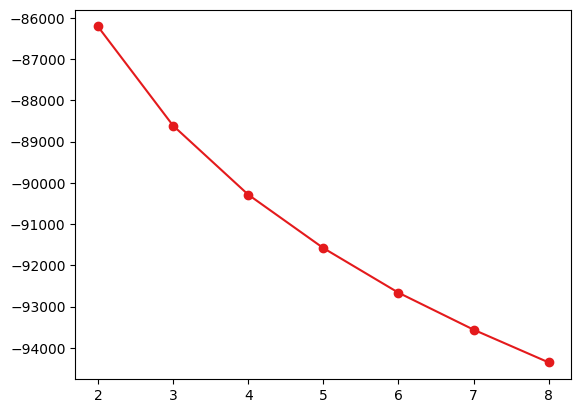

In [26]:
fig,ax = plt.subplots()
ax.plot(range(2,9),Anormy_KNN_List)
ax.scatter(range(2,9),Anormy_KNN_List)

In [27]:
k=5

In [ ]:
df_sup_knn_result = pd.DataFrame(KNNAnomalyRate(k,df_sup_train_std,sup_y,df_sup_test_std))
df_sup_knn_result.index = df_sup_test_std.index
df_sup_knn_result

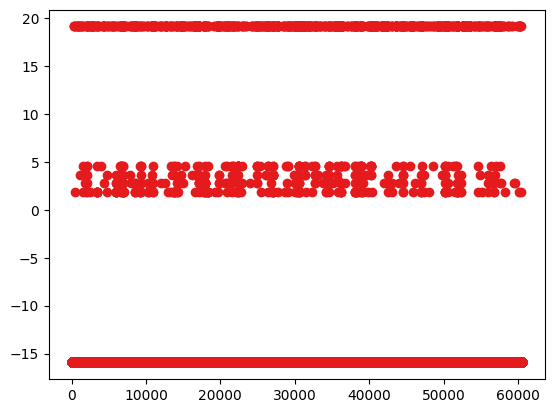

In [30]:
fig,ax = plt.subplots()

ax.scatter(range(len(df_sup_knn_result)),df_sup_knn_result)

In [31]:
List_sup_knn_result=sorted(list(set(df_sup_knn_result[0])))
List_sup_knn_abnormal_limi = List_sup_knn_result[1:]
List_sup_knn_normal_limi =List_sup_knn_result[:1]

In [32]:
df_sup_knn_abnormal_data = data_df_pre[data_df_pre.index.isin(df_sup_knn_result[df_sup_knn_result[0]==df_sup_knn_result[0].max()].index)]
df_sup_knn_abnormal_data

0           1           2           3           4  \
558     202.446052  213.569188  263.521737  356.264229  345.950208   
663     627.074351  484.242138  671.844638  412.473104  261.669108   
702     212.509083  239.920022  285.973215  553.345754  387.716636   
1023    202.297892  214.771096  272.968194  310.715995  355.471200   
1187    406.105997  724.992907  298.268011  264.194637  460.878153   
...            ...         ...         ...         ...         ...   
103030  187.179237  208.881138  336.435378  347.109054  343.433689   
103036  183.334091  208.901490  334.597356  401.251166  363.637015   
103044  166.934056  224.049995  330.554593  403.354413  389.823484   
103047  165.510509  201.245634  337.066955  400.340299  390.091272   
103185  329.384746  349.056705  580.828296  450.194095  296.846103   

                 5           6           7           8  
558     427.056069  415.417556  604.505665  628.717346  
663     231.292359  444.437007   91.218433  278.424027  
702     402.940990  489.473822  687.709912  524.741117  
1023    468.578671  545.594691  506.630969  666.306119  
1187    337.941241  285.372878  488.556266  369.186745  
...            ...         ...         ...         ...  
103030  379.877682  450.953441  481.549142  467.595394  
103036  393.108869  454.599838  534.203813  528.529661  
103044  381.947797  428.897077  459.579872  524.266856  
103047  398.420475  431.552106  485.870528  553.647989  
103185  368.760776  260.695149  294.195556  462.045563  

[1340 rows x 9 columns]

In [33]:
List_sup_knn_abnormal_data=df_sup_knn_abnormal_data.values.tolist()

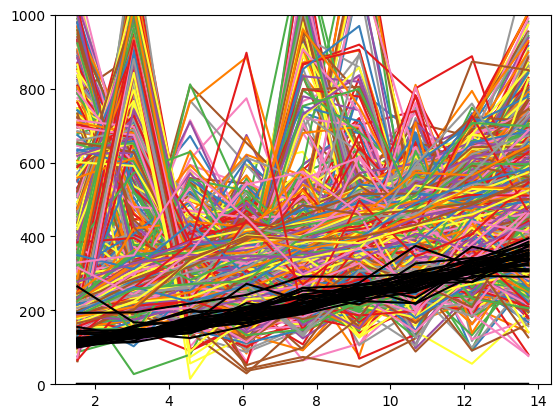

In [34]:
myvs.show_multiple_figure_TwoSorce(x,List_sup_knn_abnormal_data,D_df_limfreq.values.tolist())

In [35]:
df_sup_knn_normal_data = data_df_pre[data_df_pre.index.isin(df_sup_knn_result[df_sup_knn_result[0].isin(List_sup_knn_normal_limi)].index)]
df_sup_knn_normal_data

0           1           2           3           4  \
0       172.896067  176.513317  251.178517  237.754544  296.303427   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
5       164.901414  150.530764  196.484898  199.701386  199.286052   
8        13.659400  125.700422   59.527959  276.052435  263.203397   
9       152.421863   79.527993   61.828306   39.468506  129.363390   
...            ...         ...         ...         ...         ...   
103600   96.572769  132.802284  167.491537  238.156210  286.369018   
103601   58.018172   94.396292  143.912061  242.312630  336.439681   
103603  160.031406  130.925336  153.463327  238.527682  189.347347   
103607  104.721016  133.593078  151.468548  248.887670  189.338949   
103609  105.969081  152.464743  240.822518  264.686312  293.389996   

                 5           6           7           8  
0       458.932187  292.656312  307.286854  387.060255  
3       246.746340  190.952035  221.437342  354.225474  
5       279.239453  369.891759  472.716188  237.818942  
8       355.216348  296.501461  264.474909  119.536813  
9       152.521278  442.391471  283.746979  308.904311  
...            ...         ...         ...         ...  
103600  233.310226  247.174594  343.376586  346.728120  
103601  200.183342  241.286568  268.541866  379.545576  
103603  192.274201  228.179686  294.877368  354.249216  
103607  276.713913  191.168293  400.484528  327.071259  
103609  274.296324  175.683277  307.671430  405.552416  

[58824 rows x 9 columns]

In [36]:
List_sup_knn_normal_data=df_sup_knn_normal_data.values.tolist()

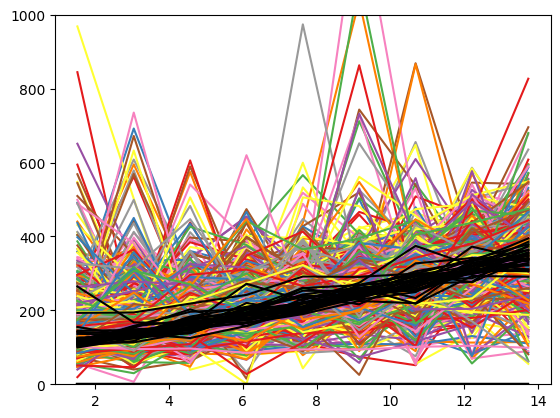

In [37]:
myvs.show_multiple_figure_TwoSorce(x,List_sup_knn_normal_data[::50],D_df_limfreq.values.tolist())

## LMNN

In [6]:
import metric_learn

In [34]:
lmnn = metric_learn.LMNN(k=6,random_state=0,learn_rate=1e-6)

In [35]:
lmnn.fit(np.array(df_sup_test_std[0:1000]),np.array(sup_y[0:1000]))

TypeError: _inplace_paired_L2() missing 2 required positional arguments: 'A' and 'B'

### SGDClassifier
- 閾値を定める教師あり学習と比べるため、通常のSGDClassifierと比較する

In [3]:
from sklearn.linear_model import SGDClassifier

In [4]:
sgd = SGDClassifier(random_state=0)

In [29]:
sgd.fit(df_sup_train_std,sup_y)

SGDClassifier(random_state=0)

In [30]:
df_sup_sgd_result = pd.DataFrame(sgd.predict(df_sup_test_std))

In [31]:
df_sup_sgd_normal_data = data_df_pre[data_df_pre.index.isin(df_sup_sgd_result[df_sup_sgd_result[0]==1].index)]
df_sup_sgd_normal_data

0           1           2           3           4           5  \
0      172.896067  176.513317  251.178517  237.754544  296.303427  458.932187   
1       75.659870  120.790621  169.793157  125.246630  179.171441  172.916762   
2       96.913210  113.915134  121.180175  122.038119  161.548251  175.660607   
3      126.852502  116.382145  156.818553  166.869081  215.471876  246.746340   
4      152.509383   80.845047  142.408379  100.871204  170.583987  265.994181   
...           ...         ...         ...         ...         ...         ...   
60588  293.503082  434.894542  308.001979  309.215070  274.635322  287.241213   
60589   89.700590  344.244647  305.300940  269.146558  258.573415  280.847618   
60590  205.100241  339.313674  241.944693  266.580281  281.339668  288.435995   
60591  204.119446  368.964845  218.051895  190.788116  257.959887  141.896006   
60592  157.958718  376.208342  192.446707  230.759573  214.634920  356.407011   

                6           7           8  
0      292.656312  307.286854  387.060255  
1      365.257365  228.995861  334.066903  
2      169.937570  264.225008  296.083163  
3      190.952035  221.437342  354.225474  
4      350.298726  220.398215  326.459230  
...           ...         ...         ...  
60588  402.335613  213.219519  331.181564  
60589  277.303564  236.628027  411.040826  
60590  340.439016  271.885843  293.931348  
60591  266.532516  378.998210  376.768731  
60592  232.254513  317.219668  346.499445  

[60119 rows x 9 columns]

In [33]:
List_sup_sgd_normal_data=df_sup_sgd_normal_data.values.tolist()

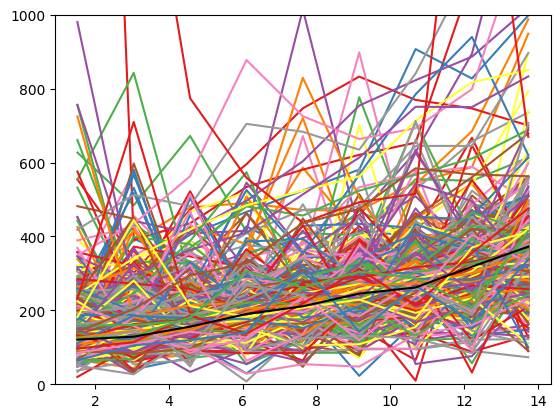

In [35]:
myvs.show_multiple_figure_TwoSorce(x,List_sup_sgd_normal_data[::60],D_df_limfreq.values.tolist())

In [32]:
df_sup_sgd_abnormal_data = data_df_pre[data_df_pre.index.isin(df_sup_sgd_result[df_sup_sgd_result[0]==-1].index)]
df_sup_sgd_abnormal_data

0           1           2           3           4           5  \
372    153.169226  159.661081  129.273179  156.669142  174.068073  282.618107   
394    254.522851  170.757134  289.277009  196.641443  340.867197  307.491315   
660    120.425304  107.725078  153.981806  282.560806  122.892160  320.223665   
712    124.837205  142.319065  139.476292  212.271816  206.847267  226.053360   
908    215.130367  156.390478  170.638361  227.599080  182.654988  181.073768   
...           ...         ...         ...         ...         ...         ...   
57642   67.863260  147.632924  132.092637  165.649351  472.410720  212.052015   
58003  140.865210  112.626346  154.091005  153.532777  182.977306  245.458014   
58559  144.358662  187.914537  215.253625  248.661318  251.955919  231.779777   
60019  134.030487  145.583805  186.724052  184.000492  215.175213  242.765606   
60147  373.022180  202.103726  235.191917  147.420209  281.226863  210.794206   

                6           7           8  
372    290.132758  347.269365  261.086563  
394    344.385496  288.345690  287.678870  
660    340.671147  520.154270  385.712557  
712    260.275987  303.791782  288.630990  
908    192.407530  334.724425  309.284580  
...           ...         ...         ...  
57642  374.829600  361.222930  260.708640  
58003  415.275617  281.499201  319.704710  
58559  315.489936  346.276184  361.832151  
60019  262.367053  315.149996  308.135643  
60147  266.762119  271.897375  319.756829  

[474 rows x 9 columns]

In [36]:
List_sup_sgd_abnormal_data=df_sup_sgd_abnormal_data.values.tolist()

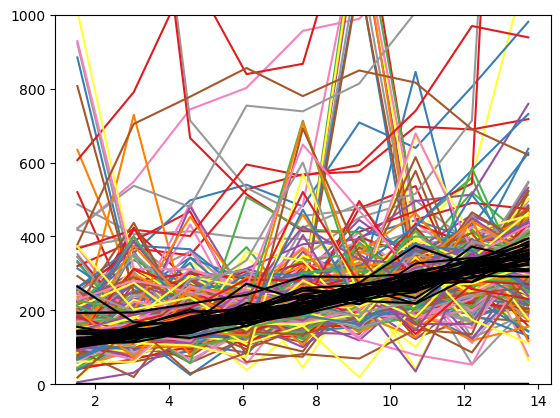

In [37]:
myvs.show_multiple_figure_TwoSorce(x,List_sup_sgd_abnormal_data[::1],D_df_limfreq.values.tolist())

- やはりSGDではむずいか

## 半半教師学習
- KMeansでラベリングした後、さらに教師なし学習で分けてから、教師あり学習をさせる